In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


dace_gpu = pd.read_csv('dace_gpu_new.csv')


In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c_cuda = pd.read_csv('c_cuda_new.csv')
#print(c_cuda)
gpu_frames = [c_cuda]

cuda_data = []

for size in [8, 16, 32, 64, 128, 256]:
    asize = size * 1024

    gpu_filter_by_size = [df[df['size'] == asize] for df in gpu_frames]
    gpu_by_nproam = [df.groupby('nproma').mean().reset_index() for df in gpu_filter_by_size]

    gpu_min_time = [df[df['execution_time'] == df['execution_time'].min()] for df in gpu_by_nproam]

    single_best_nproma = [df['nproma'].values[0] for df in single_min_time]
    multi_best_nproma = [df['nproma'].values[0] for df in multi_min_time]
    gpu_best_nproma = [df['nproma'].values[0] for df in gpu_min_time]

    gpu_best_nproma_runtimes = [df[df['nproma'] == gpu_best_nproma[i]] for i, df in enumerate(gpu_filter_by_size)]
    #print(gpu_best_nproma_runtimes)
    cuda_data.append(*gpu_best_nproma_runtimes)
#print(cuda_data)
cuda_data = pd.concat(cuda_data,axis=0)

In [48]:
full_data = pd.concat([dace_gpu, cuda_data])
full_data

,Unnamed: 0,threads,size,nproma,repetition,execution_time,type,total_time
0,0,1,8192,1,11,16,dace_v100,NaN
1,1,1,8192,1,9,16,dace_v100,NaN
2,2,1,262144,1,11,190,dace_v100,NaN
3,3,1,32768,1,3,28,dace_v100,NaN
4,4,1,4096,1,15,15,dace_v100,NaN
...,...,...,...,...,...,...,...,...
1076,1076,1,262144,128,7,145,cuda_v100,3601.0
1159,1159,1,262144,128,14,144,cuda_v100,3591.0
1173,1173,1,262144,128,3,145,cuda_v100,3602.0
1175,1175,1,262144,128,13,145,cuda_v100,3603.0


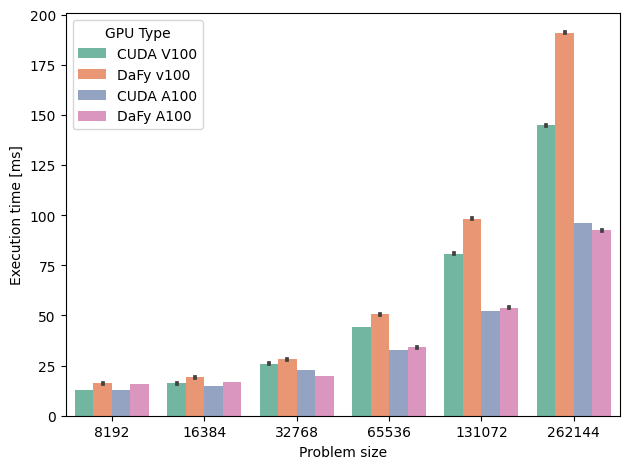

In [63]:
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True)

color = sns.color_palette("Set2", 4)
p = sns.barplot(x='size', y='execution_time', hue='type', 
                hue_order=['cuda_v100', 'dace_v100', 'cuda_a100', 'dace_a100'], 
                palette=color, data=full_data[full_data['size'] > 4096])
p.set_ylabel('Execution time [ms]')
p.set_xlabel('Problem size')
handles,labels = p.get_legend_handles_labels()
#print(labels,handles)
p.legend(handles=handles, labels=['CUDA V100', 'DaFy v100', 'CUDA A100', 'DaFy A100'], title='GPU Type')

fig = p.get_figure()
fig.tight_layout()
#plt.show()
fig.savefig(f'dafy_a100_v100.pdf', bbox_inches='tight')